In [2]:
!pip install torch torchvision matplotlib


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 341kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.72MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.63MB/s]


Actual Label: 5


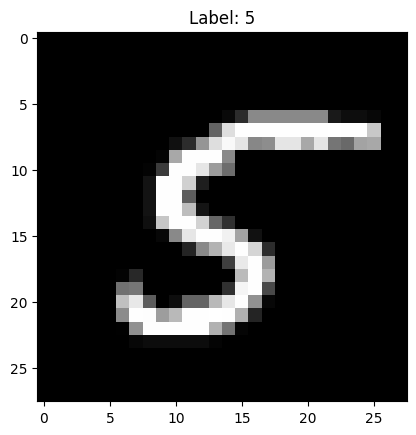

Model Prediction (Untrained): 8


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# Automatically downloads and loads digit images
transform = transforms.ToTensor()

test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=1, shuffle=True
)
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Flattened 28x28 = 784 input
        self.fc2 = nn.Linear(128, 10)     # 10 output classes (0-9)

    def forward(self, x):
        x = x.view(-1, 28*28)     # Flatten the image
        x = F.relu(self.fc1(x))   # Hidden layer with ReLU
        x = self.fc2(x)           # Final output layer
        return x

# Initialize model
model = SimpleNet()
# Get one random image and label
data_iter = iter(test_loader)
image, label = next(data_iter)

print("Actual Label:", label.item())
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label.item()}")
plt.show()
model.eval()  # Put model in eval mode

# Forward pass (no training, so weights are random)
output = model(image)

# Get the predicted class
pred = torch.argmax(output)

print("Model Prediction (Untrained):", pred.item())

